In [104]:
import numpy as np

def norm(arr):
    max = np.amax(arr)
    for i in arr:
        for j in range(len(i)):
            i[j] = i[j]/max
    return np.array(arr)

def avg_var(arr):
    num = 0
    sum = 0
    sum_2 = 0
    x = 0
    y = 0
    for i in arr:
        for j in i:
            sum += j
            sum_2 += j*j
            num += 1
    avg = sum/num
    var = sum_2/num - avg*avg
    return avg, var


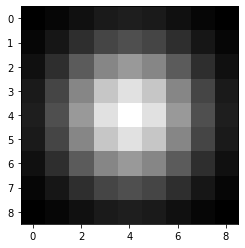

In [105]:
# read PSF
testcase = 'crema.list'
import matplotlib.pyplot as plt

psf = np.load('2dGaussian.npy')
plt.imshow(psf, cmap='gray')
plt.show()


# grad = signal.convolve2d(ascent, scharr, boundary='symm', mode='same')

# import matplotlib.pyplot as plt

# fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(6, 15))

# ax_orig.imshow(ascent, cmap='gray')

# ax_orig.set_title('Original')

# ax_orig.set_axis_off()

# ax_mag.imshow(np.absolute(grad), cmap='gray')

# ax_mag.set_title('Gradient magnitude')

# ax_mag.set_axis_off()

# ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles

# ax_ang.set_title('Gradient orientation')

# ax_ang.set_axis_off()

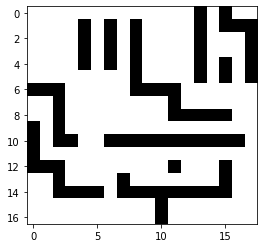

In [106]:
# see whole pattern
import pickle

with open('testcase/'+testcase, 'rb') as filehandle:
    testcase = pickle.load(filehandle)
x = testcase[0][1]
y = testcase[0][0]

plane = np.zeros(shape=(x,y))
for i in range(x):
    for j in range(y):
        plane[i][j] = 1

for g in range(1,len(testcase)):
    group = testcase[g]
    for i in group:
        for j in i:
            for k in j:
                plane[k[1]][k[0]] = 0

plt.imshow(plane, cmap='gray')
plt.show()

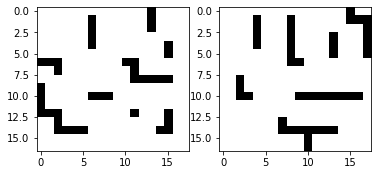

In [107]:
mask0 = np.zeros(shape=(x,y))
mask1 = np.zeros(shape=(x,y))
for i in range(x):
    for j in range(y):
        mask0[i][j] = 1
        mask1[i][j] = 1

dis = []
w = 0
b = 0

for i in range(1,len(testcase)):
    dis.append(True)

for g in range(1,len(testcase)):
    group = testcase[g]
    if dis[g-1] == True:
        w = group[0]
        b = group[1]
    else:
        b = group[0]
        w = group[1]
    for j in w:
        for k in j:
            mask0[k[1]][k[0]] = 0
    for j in b:
        for k in j:
            mask1[k[1]][k[0]] = 0

fig, (m0, m1) = plt.subplots(1,2)

m0.imshow(mask0, cmap='gray')
m1.imshow(mask1, cmap='gray')
fig.show()

20.854664271105825 2.8783244214365027 20.54106029710424 4.3154021011116015


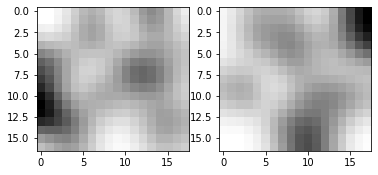

In [108]:
from scipy import signal
flare0 = signal.convolve2d(mask0, psf, boundary='symm', mode='same')
avg0, var0 = avg_var(flare0)
flare1 = signal.convolve2d(mask1, psf, boundary='symm', mode='same')
avg1, var1 = avg_var(flare1)
print(avg0, var0, avg1, var1)

flare0 = norm(flare0)
flare1 = norm(flare1)
fig , (f0, f1) = plt.subplots(1,2)

f0.imshow(flare0, cmap='gray')
f1.imshow(flare1, cmap='gray')
fig.show()